In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Laura Camila Rios Quintero
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
# para integral I
a= 1e-6  # limite inferior
b= np.pi/2 - 1e-6 # limite suerior

f = lambda x: 1/(np.sqrt(np.tan(x)))  # Función

In [ ]:
# para integral I
a= 1e-6  # limite inferior
b= np.pi/2 - 1e-6 # limite suerior

f = lambda x: 1/(np.sqrt(np.tan(x)))  # Función


# Método trapezoidal

def trapezoidal(f, a,b,n):

    h = (b-a)/n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        x_i = a + i * h
        integral += f(x_i)

    return integral * h

def trapezoidal_error(f, a, b, e):
    """
    Método del trapecio adaptativo para garantizar un error menor que e.
    f: función a integrar
    a: límite inferior
    b: límite superior
    e: tolerancia de error
    return: valor de la integral y número de subdivisiones usadas
    """
    n = 1  # Empezamos con 1 intervalo
    integral_0 = trapezoidal(f, a, b, n)
    error = float('inf')

    while error > e:
        n *= 2  # Duplicamos el número de particiones
        integral_1 = trapezoidal(f, a, b, n)
        error = abs(integral_1 - integral_0)   # Estimación de error
        integral_0 = integral_1  # Actualizar el valor de la integral

    return integral_1, n


resultado, n_valor = trapezoidal_error(f,a,b,e=1e-5)

print(f'Resultado de la integral: {resultado} en n={n_valor} subdivicioones')

Resultado de la integral: 2.2194429262416673 en n=8388608 subdivicioones


In [ ]:
# Método simpson
def simpson13(f, a, b, n):
  '''
  f: función a integrar
  a: límite inferior
  b: límite superior
  n: número de intervalos
  return: valor de la integral
  '''
  h = (b - a) / n
  integral = (f(a) + f(b))
  # Suma de los términos impares
  for i in range(1, n, 2):
    x_i = a + i * h
    integral += 4 * f(x_i)
  # Suma de los términos pares
  for i in range(2, n, 2):
    x_i = a + i * h
    integral += 2 * f(x_i)
  return integral * h/3



#Funcion garantizando el error<e
def simpson_error(f, a, b, e):


    n = 1  # Empezamos con 1 intervalo
    integral_0 = simpson13(f, a, b, n)
    error = float('inf')

    while error > e:
        n *= 2  # Duplicamos el número de particiones
        integral_1 = simpson13(f, a, b, n)
        error = abs(integral_1 - integral_0)   # Estimación de error
        integral_0 = integral_1  # Actualizar el valor de la integral

    return integral_1, n


resultado, n_valor = simpson_error(f,a,b,e=1e-5)

print(f'Resultado de la integral: {resultado} en n={n_valor} subdivicioones')




Resultado de la integral: 2.2194416357347593 en n=4194304 subdivicioones


In [ ]:
#Método de cuadratura
def cuadratura(f, a, b, n):
  '''
  f: función a integrar
  a: límite inferior
  b: límite superior
  n: número de intervalos
  return: valor de la integral
  '''
  h = (b - a) / n
  integral = 0
  for i in range(n):
    x_i = a + i * h
    integral +=  f(x_i + h/2)
  return integral * h


#Funcion garantizando el error<e
def cuadratura_error(f, a, b, e):


    n = 1  # Empezamos con 1 intervalo
    integral_0 = cuadratura(f, a, b, n)
    error = float('inf')

    while error > e:
        n *= 2  # Duplicamos el número de particiones
        integral_1 = cuadratura(f, a, b, n)
        error = abs(integral_1 - integral_0)   # Estimación de error
        integral_0 = integral_1  # Actualizar el valor de la integral

    return integral_1, n


resultado, n_valor = cuadratura_error(f,a,b,e=1e-5)

print(f'Resultado de la integral: {resultado} en n={n_valor} subdivicioones')



Resultado de la integral: 2.219438588924572 en n=4194304 subdivicioones


In [ ]:
g = lambda x: np.cos(x)/x**3



print(f'metodo trapezoidal:{trapezoidal_error(g,a=1,b=80,e=1e-5)[0]}, con n: {trapezoidal_error(g,a=1,b=80,e=1e-5)[1]} subdivisiones')
print(f'metodo simpson:{simpson_error(g,a=1,b=80,e=1e-5)[0]} con n: {simpson_error(g,a=1,b=80,e=1e-5)[1]} subdivisiones')
print(f'metodo cuadratura:{cuadratura_error(g,a=1,b=80,e=1e-5)[0]} con n: {cuadratura_error(g,a=1,b=80,e=1e-5)[1]} subdivisiones')

metodo trapezoidal:0.018116885163346388, con n: 32768 subdivisiones
metodo simpson:0.01811573621619004 con n: 4096 subdivisiones
metodo cuadratura:0.018113307129039705 con n: 16384 subdivisiones


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



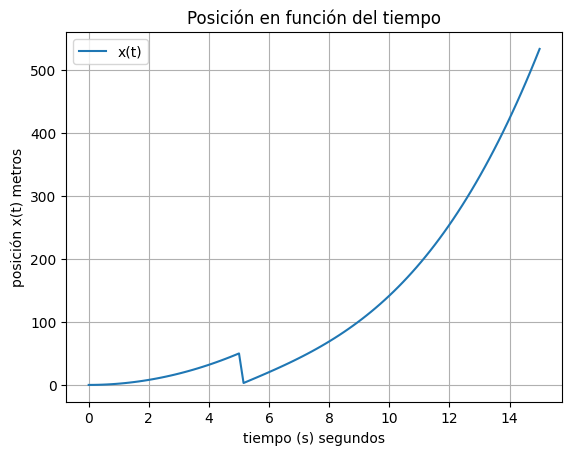

In [3]:
#Aquí va su código

# Función entre 0 y 5 segundos
v_x = lambda t: 4*t


#Funcion entre 5 y 15 segundos
v_x2 = lambda t: 20+(5-t)**2
t2= np.linspace(5,15,100)

# Conocer x se debe integrar las funciones

def posicion(f_1,f_2,t):

    x_ = []
    for i in t:
        if i<=5:
            integral = quad(f_1,0,i)[0]
            x_.append(integral)
        else:
            integral_ = quad(f_2,5,i)[0]
            x_.append(integral_)
    return x_

t = np.linspace(0,15,100)

valores_x= posicion(v_x,v_x2,t)


#Graficar
plt.plot(t,valores_x,label= 'x(t)')
plt.xlabel('tiempo (s) segundos')
plt.ylabel('posición x(t) metros')
plt.title("Posición en función del tiempo")
plt.legend()
plt.grid()
plt.show()

In [6]:
#b)

# Desplazamiento total

integral_total = quad(v_x,0,5)[0] + quad(v_x2,5,15)[0]

F= 200 #Newtons
trabajo = integral_total*F
print(f'El trabajo es igual a: {trabajo} J')

El trabajo es igual a: 116666.6666666667 J


#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


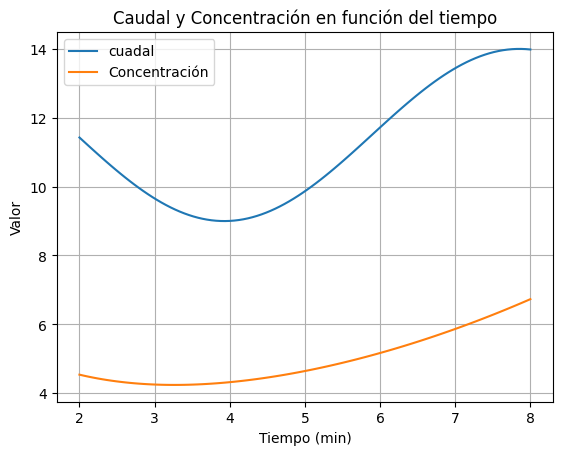

In [13]:
#Aquí va su código

#Funcion Q(t) y C(t)
Q_t = lambda t:  9 + 5 * np.cos(0.4 * t)**2
C_t = lambda t: 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)

valores_t = np.linspace(2,8,100)

valores_Q= Q_t(valores_t)
valores_C= C_t(valores_t)

plt.plot(valores_t, valores_Q, label='cuadal')
plt.plot(valores_t, valores_C, label=r'Concentración')
plt.xlabel("Tiempo (min)")
plt.ylabel("Valor")
plt.title("Caudal y Concentración en función del tiempo")
plt.legend()
plt.grid()
plt.show()

In [14]:
#b) integral
funcion = lambda t:  (9 + 5 * np.cos(0.4 * t)**2)*(5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t))

integracion = romberg(funcion,2,8)
print(f'masa transportada es igual a:{integracion} mg')

masa transportada es igual a:335.9625300616253 mg


<ipython-input-14-08b8c0f1febf>:4: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  integracion = romberg(funcion,2,8)


In [18]:
# con quad
integracion_2 = quad(funcion,2,8)[0]
print(f'Masa transportada es:{integracion_2} mg')

Masa transportada es:335.9625300616257 mg


#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
#Aquí va su código

#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


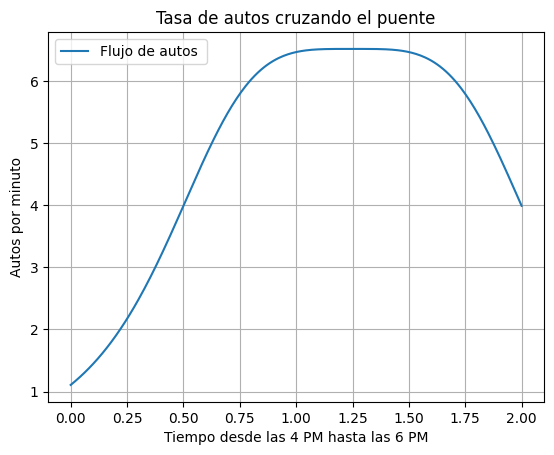

In [20]:
#Aquí va su código

funcion = lambda t: (22.8)/(3.5 + 7 * (t - 1.25)**4)

tiempo = np.linspace(0,2,300)

plt.plot(tiempo, funcion(tiempo), label='Flujo de autos ')
plt.xlabel("Tiempo desde las 4 PM hasta las 6 PM")
plt.ylabel("Autos por minuto")
plt.title("Tasa de autos cruzando el puente")
plt.legend()
plt.grid()
plt.show()

In [25]:
# Para calcular el numero de autos en este tiempo hay que integrar

# Valor aproximado
# Método simpson
def simpson13(f, a, b, n):
  '''
  f: función a integrar
  a: límite inferior
  b: límite superior
  n: número de intervalos
  return: valor de la integral
  '''
  h = (b - a) / n
  integral = (f(a) + f(b))
  # Suma de los términos impares
  for i in range(1, n, 2):
    x_i = a + i * h
    integral += 4 * f(x_i)
  # Suma de los términos pares
  for i in range(2, n, 2):
    x_i = a + i * h
    integral += 2 * f(x_i)
  return integral * h/3


  # valor real
integral_ = quad(funcion,0,2)[0]


# Erro relativo
error = (abs(simpson13(funcion,0,2,200)-integral_)*100)/abs(integral_)

print(f'Valor real de numeros de autos:{integral_}')
print(f'Valor aproximado de numeros de autos: {simpson13(funcion,0,2,200)}')
print(f'Error relativo: {error}')

Valor real de numeros de autos:9.991854348486756
Valor aproximado de numeros de autos: 9.991854353291485
Error relativo: 4.8086460145287544e-08


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:

# Integral K(k)

def K(k_cuadrado):

    integrando_K = lambda x: 1/np.sqrt(1-(k_cuadrado*np.sin(x)**2))
    return quad(integrando_K,0,np.pi/2)[0]

#Integral E(k)
def E(k_cuadrado):

    integrando_E = lambda x: np.sqrt(1- (k_cuadrado*np.sin(x)**2))
    return quad(integrando_E,0,np.pi/2)[0]


def A(r,x,a=1,I=3):
    k = (4*r*np.sin(x))/(1+ r**2 + 2*r*np.sin(x))

    #Metiendo k en E y K

    valor_K = K(k)
    valor_E = E(k)

    expresion_A = (4*I*a / np.sqrt(a**2 + r**2 +2*a*r*np.sin(x)))*(((2-k)*valor_K - 2*valor_E)/k)
    return expresion_A


<ipython-input-14-023701d45cfd>:23: RuntimeWarning: invalid value encountered in scalar divide
  expresion_A = (4*I*a / np.sqrt(a**2 + r**2 +2*a*r*np.sin(x)))*(((2-k)*valor_K - 2*valor_E)/k)


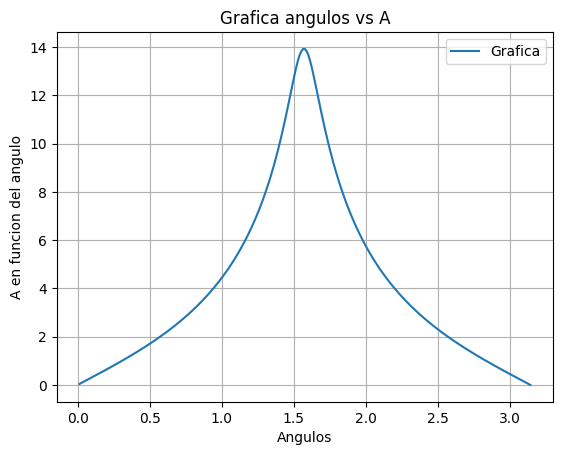

In [ ]:
# a
# Grafica

valores_x= np.linspace(0,np.pi,250)

valores_A = []
for i in valores_x:
    valores_A.append(A(1.1,i))


plt.plot(valores_x, valores_A, label = 'Grafica')
plt.xlabel('Ángulos')
plt.ylabel('A en función del ángulo')
plt.title('Grafica ángulos vs A')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-14-023701d45cfd>:23: RuntimeWarning: invalid value encountered in scalar divide
  expresion_A = (4*I*a / np.sqrt(a**2 + r**2 +2*a*r*np.sin(x)))*(((2-k)*valor_K - 2*valor_E)/k)


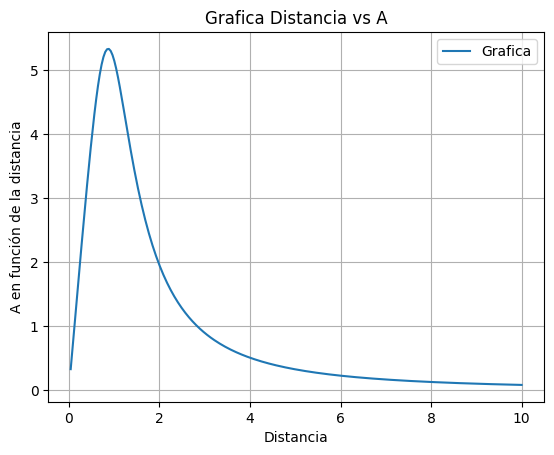

In [ ]:
#b
valores_r = np.linspace(0,10,250)

valores_A2 = []
for i in valores_r:
    valores_A2.append(A(i,np.pi/3))


plt.plot(valores_r, valores_A2, label = 'Grafica')
plt.xlabel('Distancia')
plt.ylabel('A en función de la distancia')
plt.title('Grafica Distancia vs A')
plt.legend()
plt.grid(True)
plt.show()